In [2]:
!pip install selenium
!pip install webdriver_manager
!pip install pandas

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------------- 0.0/10.7 MB 435.7 kB/s eta 0:00:25
     --------------------------------------- 0.0/10.7 MB 435.7 kB/s eta 0:00:25
     --------------------------------------- 0.1/10.7 MB 357.2 kB/s eta 0:00:30
     --------------------------------------- 0.1/10.7 MB 403.5 kB/s eta 0:00:27
     --------------------------------------- 0.1/10.7 MB 437.6 kB/s eta 0:00:25
      -------------------------------------- 0.2/10.7 MB 459.5 kB/s eta 0:00:24
      -------------------------------------- 0.2/10.7 MB 535.8 kB/s eta 0:00:20
      -------------------------------------- 0.2/10.7 MB 576.2 kB/s eta 0:00:19
     - ------------------------------------- 0.3/10.7 MB 609.2 kB/s eta 0:00:18
     - ------------------------------------- 0.3/10.7 MB 614.4 kB/s eta 0:00:17
     - ------------------------------------- 0.4/10.7 MB

In [7]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging

In [10]:
webdriver_service = Service(ChromeDriverManager().install())

[WDM] - Downloading: 100%|██████████| 6.81M/6.81M [00:01<00:00, 6.54MB/s]


In [12]:
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

In [13]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

In [14]:
book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [15]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    
    character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'],'character': elem.text})

In [24]:
character_df = pd.DataFrame(character_list)

In [27]:
character_df['book'] = character_df['book'].str.replace('Category:', '')
character_df

book               character
0      Baptism of Fire characters                  Adalia
1      Baptism of Fire characters                   Adela
2      Baptism of Fire characters           Aen Saevherne
3      Baptism of Fire characters                Aevenien
4      Baptism of Fire characters                  Aglaïs
...                           ...                     ...
1270  Time of Contempt characters        Yanna of Murivel
1271  Time of Contempt characters           Yarpen Zigrin
1272  Time of Contempt characters  Yennefer of Vengerberg
1273  Time of Contempt characters         Yiolenta Suarez
1274  Time of Contempt characters                   Zyvik

[1275 rows x 2 columns]

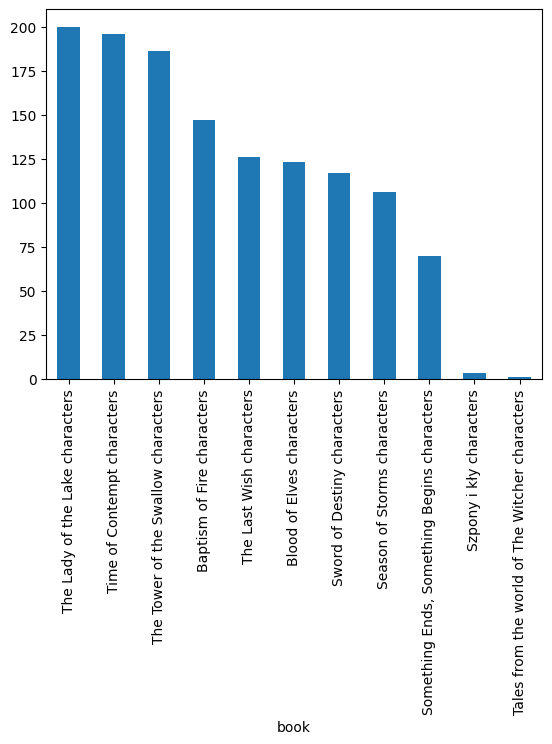

In [26]:
character_df['book'].value_counts().plot(kind="bar")
plt.show()

In [28]:
character_df.to_csv('characters.csv')